# Testing the data loaders

In [1]:
from load_data import return_dataset
import json
import matplotlib.pyplot as plt

data_path = 'C:/Users/vdelchev/Documents/datasets/CycleGANs'
save_dir = '.'
model = 'cgan256'

In [3]:
dataset = 'breast'

with open('models_config.json', 'r') as json_file:
    model_config = json.load(json_file)[model]
with open('datasets_config.json', 'r') as json_file:
    dataset_config = json.load(json_file)[dataset]

train, test_normal, test_abnormal = return_dataset('breast', data_path, model_config, dataset_config, 0)

4095


In [4]:
print(len(train), len(test_normal), len(test_abnormal))

128 3 3


torch.Size([32, 1, 256, 256]) tensor(1.) tensor(-1.)


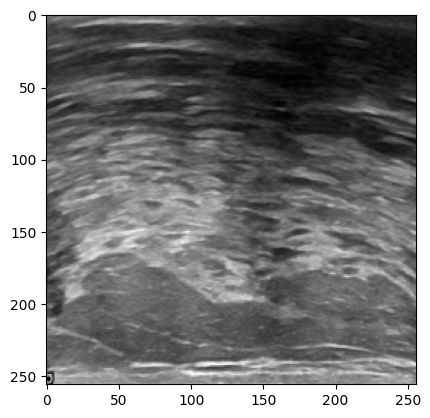

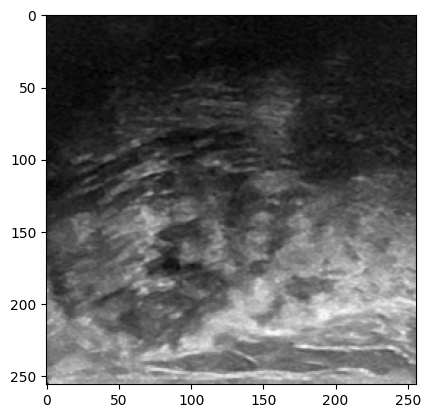

In [5]:
for data in train:
    try:
        print(data['normal'].shape, data['normal'].max(), data['normal'].min())
        plt.imshow((data['normal'][0,0,:,:]+1.)/2., cmap='gray')
        plt.show()
        plt.imshow((data['abnormal'][0,0,:,:]+1.)/2., cmap='gray')
        plt.show()
    except:
        print(data['image'].shape, data['image'].max(), data['image'].min())
        plt.imshow((data['image'][0,:,:,:].numpy().transpose(1,2,0)+1.)/2.)
        plt.show()
    break

In [6]:
for data in test_normal:
    print(data['image'].shape, data['image'].max(), data['image'].min())

torch.Size([32, 1, 256, 256]) tensor(1.) tensor(-1.)
torch.Size([32, 1, 256, 256]) tensor(1.) tensor(-1.)
torch.Size([2, 1, 256, 256]) tensor(1.) tensor(-1.)


In [7]:
for data in test_abnormal:
    print(data['image'].shape, data['image'].max(), data['image'].min())

torch.Size([32, 1, 256, 256]) tensor(1.) tensor(-1.)
torch.Size([32, 1, 256, 256]) tensor(1.) tensor(-1.)
torch.Size([2, 1, 256, 256]) tensor(1.) tensor(-1.)


# Testing the training setup

In [8]:
from training_setup import return_training_setup

setup = return_training_setup(model, model_config, dataset_config)

In [9]:
print(setup)

{'models': {'netG_normal2abnormal': ResnetGenerator(
  (model): Sequential(
    (0): ReflectionPad2d((3, 3, 3, 3))
    (1): Conv2d(1, 64, kernel_size=(7, 7), stride=(1, 1), bias=False)
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU(inplace=True)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (8): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): ResnetBlock(
      (conv_block): Sequential(
        (0): ReflectionPad2d((1, 1, 1, 1))
        (1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), bias=False)
        (2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (3): ReL